# Data Preparation and Customer Analytics

#### Ben Crabtree

## Import Data Sets

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import xlrd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

#from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
transactions = pd.read_excel(r'QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv(r'QVI_purchase_behaviour.csv')

## Exploratory Data Analysis and Data Preparation

### Transactions Set

The transaction dataset has 264,836 rows and 8 columns. Of those columns, 7 are numeric (6 int64 and 1 float64) and one (product name) is a column of strings.

There are no null values in any of the columns.

In [3]:
print(transactions.shape)
print(purchase_behaviour.shape)

(264836, 8)
(72637, 3)


In [4]:
transactions.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
print(type(transactions.PROD_NAME[0]))

<class 'str'>


#### Variable Interpretation

Each row of the dataset signifies a different transaction, but it is not immediately clear what some of the columns refer to and there is no data dictionary to define them. After some investigation we conclude they mean the following:

- DATE: A column of dates between 2018-07-01 and 2019-06-30.
- STORE_NBR: A unique integer encoding a particular store.
- LYLTY_CARD_NBR: A unique integer encoding a particular customer who has signed up for a loyalty card.
- TXN_ID: A unique integer encoding a particular transaction or set of transactions on a given date.
- PROD_NBR: A unique integer encoding a particular item purchased.
- PROD_NAME: A string containing the brand of the item purchased, flavour and pack size.
- PROD_QTY: An integer signifying the number of items purchased in a transaction.
- TOT_SALES: A float signifying the total dollar value of a transaction calculated by price of item multiplied by PROD_QTY value.

#### Date

The date column is in numeric form, as is common in excel format data. So we will convert these to python's date format. We also see that there are 364 unique dates in this dataset, meaning it records transactions that took place over the course of one year, but one date is missing.

In [7]:
print(len(transactions.DATE.unique()))

364


In [8]:
# CONVERT DATES TO DATE FORMAT

def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)

transactions.DATE = pd.to_datetime(transactions.DATE.apply(read_date), errors='coerce')

transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


We can create a summary of the number of transactions on each date and see that the most transactions occur on 2018-12-24 with 939 transactions. This makes sense as it was Christmas Eve. The fewest transactions occur on 2018-11-25 with 648 transactions.

In [9]:
transactions.DATE.value_counts()

2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
2018-12-20    855
2018-12-21    842
2019-06-07    807
2018-09-06    791
2018-11-20    788
2018-12-17    786
2019-04-20    785
2019-06-14    784
2019-06-15    781
2019-05-19    779
2018-09-23    778
2018-09-25    778
2019-03-22    775
2018-10-09    774
2019-03-05    774
2018-11-11    774
2018-10-26    771
2018-11-19    770
2019-06-09    769
2018-09-04    769
2019-04-24    768
2019-03-17    765
2018-08-15    764
2018-09-18    764
2019-02-08    763
             ... 
2019-04-07    687
2018-08-28    686
2019-01-01    686
2018-08-12    686
2019-01-11    685
2018-09-27    684
2019-06-04    684
2018-09-13    684
2019-05-13    682
2019-04-01    682
2018-11-22    681
2019-01-24    680
2019-01-21    679
2019-05-04    679
2018-11-26    679
2019-05-18    679
2019-05-23    677
2019-01-13    677
2019-05-15    676
2019-06-11    673
2019-02-18    673
2019-01-03    672
2018-12-08    672
2019-04-11    671
2018-09-22

We can now find the missing date. The earliest date in the dataset is 2018-07-01 and the last date is 2019-06-30. So we can create a set of dates between these values and then subtract the unique set of dates present in the dataset to find the missing date. Upon doing this, we can see the missing date is 2018-12-25, which makes sense as this is Christmas day, a public holiday.

In [10]:
dates = transactions.DATE.tolist()
print('Earliest Date: ', transactions.DATE.min())
print('Latest Date: ', transactions.DATE.max())

date_set = set(transactions.DATE.min() + timedelta(x) for x in range(365))
missing = sorted(date_set - set(transactions.DATE))
print('Missing Date: ', missing)

Earliest Date:  2018-07-01 00:00:00
Latest Date:  2019-06-30 00:00:00
Missing Date:  [Timestamp('2018-12-25 00:00:00')]


### Outliers

While the values of all but one of the columns are numeric, many of the columns are categorical rather than continuous with the numbers encoding something specific. These include date, store numbers, loyalty card numbers, transaction ID numbers and product numbers. Only the PROD_QTY and TOT_SALES columns seem numerical in the sense of reflecting quantities.

For this reason, the most interesting figures in the summary of descriptive stistics for the transaction dataset relate to these columns, which as we have noted above are likely related directly, as we assume the total sales value is given by the price of the item purchased multiplied by the product quantity for each transaction.

In [11]:
transactions.describe().round(2)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00,264836.00,264836.00,264836.00,264836.00,264836.00
mean,135.08,135549.48,135158.31,56.58,1.91,7.30
std,76.78,80579.98,78133.03,32.83,0.64,3.08
min,1.00,1000.00,1.00,1.00,1.00,1.50
25%,70.00,70021.00,67601.50,28.00,2.00,5.40
50%,130.00,130357.50,135137.50,56.00,2.00,7.40
75%,203.00,203094.25,202701.25,85.00,2.00,9.20
max,272.00,2373711.00,2415841.00,114.00,200.00,650.00


Examining PROD_QTY, we can see that the minimum number of items bought in any transaction is 1 as expected, but the maximum is 200. When looking at value counts, we see this occurs twice in the dataset, on two different dates, first on 19th August 2018 and second on 20th May 2019. Both times the purchases were made by the same customer (loyalty card number 226000) at the same store (number 226), buying 200 of the same product (Dorito Corn Chips Supreme 380g).

These are the only two transactions made by this customer in the dataset, and it is apparent that this particular customer buys in bulk, possibly for commercial reasons, and is not a regular consumer. Finding this customer by loyalty card number in the purchasing behaviour dataset we see that they fall into the lifestage 'older families' and they are a premium customer.

As their buying behaviour does not reflect usual consumer behaviour, we will treat these observations as outliers and remove them from the transactions dataset.

In [12]:
print(transactions.PROD_QTY.value_counts())

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64


In [13]:
print(transactions[transactions.PROD_QTY == 200])

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [14]:
print(transactions[transactions.LYLTY_CARD_NBR == 226000])

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [15]:
print(purchase_behaviour[purchase_behaviour.LYLTY_CARD_NBR == 226000])

       LYLTY_CARD_NBR       LIFESTAGE PREMIUM_CUSTOMER
59694          226000  OLDER FAMILIES          Premium


#### Plotting Product Quantity vs Total Sales

Plotting product quantity with outliers, we do not see much of a pattern as the outliers dominate the scale of the plot. However, after removing outliers, the scatter plot of PROD_QTY reveals a positive linear trend - as product quantity increases, total sales increases.

After removing outliers the dataframe transactions_ol is what we will work with from now on.

Text(0,0.5,'Total Sales')

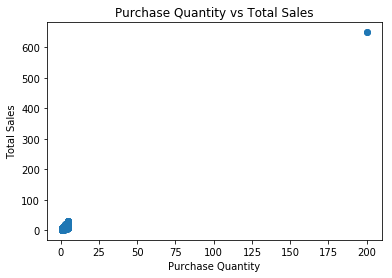

In [16]:
quantity = transactions.PROD_QTY
sales = transactions.TOT_SALES
plt.scatter(quantity, sales)
plt.title('Purchase Quantity vs Total Sales')
plt.xlabel('Purchase Quantity')
plt.ylabel('Total Sales')

Text(0,0.5,'Total Sales')

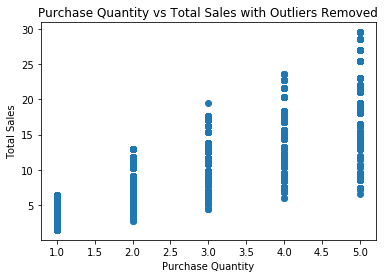

In [17]:
transactions_ol = transactions[transactions.PROD_QTY < 200]
qty_outrem = transactions_ol.PROD_QTY
sales_outrem = transactions_ol.TOT_SALES
plt.scatter(qty_outrem, sales_outrem)
plt.title('Purchase Quantity vs Total Sales with Outliers Removed')
plt.xlabel('Purchase Quantity')
plt.ylabel('Total Sales')

#### Plotting Distributions

Examining the distribution of the columns in the transactions dataset with the two outlier transactions removed:

- There are no outliers in the store number values.
- Most of the values of loyalty card number are clustered between 0 and 250,000 but there is a maximum of 2,373,711 which seems to be a large outlier. There are around 18,000 rows that have loyalty card number values larger than 250,000 none of which appear with a frequency higher than 16. In such a large data set these values do not show up very well in the distribution plot. Not knowing how the loyalty card numbers are assigned, there is no way to tell if this range of values is meaningful or the large values are 'outliers' in a meaninfgul sense, so we will not alter these in any way.
- Transaction ID also appears to have values clustered in the 0 to 250,000 range with some very large 'outliers' with a maximum of 2,415,841. Again, not knowing how these numbers are assigned it is hard to say whether these are in fact outliers, so we will not alter them.
- Product numbers are fairly uniformly distributed with some showing up much more frequently than others. This reflects the popularity of certain brands and flavours of chips. There are no outliers in these numbers, and they are categorical anyway. When we compare the value counts of the product numbers with the value counts of the product names we see that the frequencies match, meaning there are no irregularities with the way product numbers are assigned.
- Product quantity and total sales as discussed already are likely related and both show a similar distribution with most of the values of product quantity in the 1 to 3 range. Total sales seem mostly concentrated in the 0 to 15 dollar range.


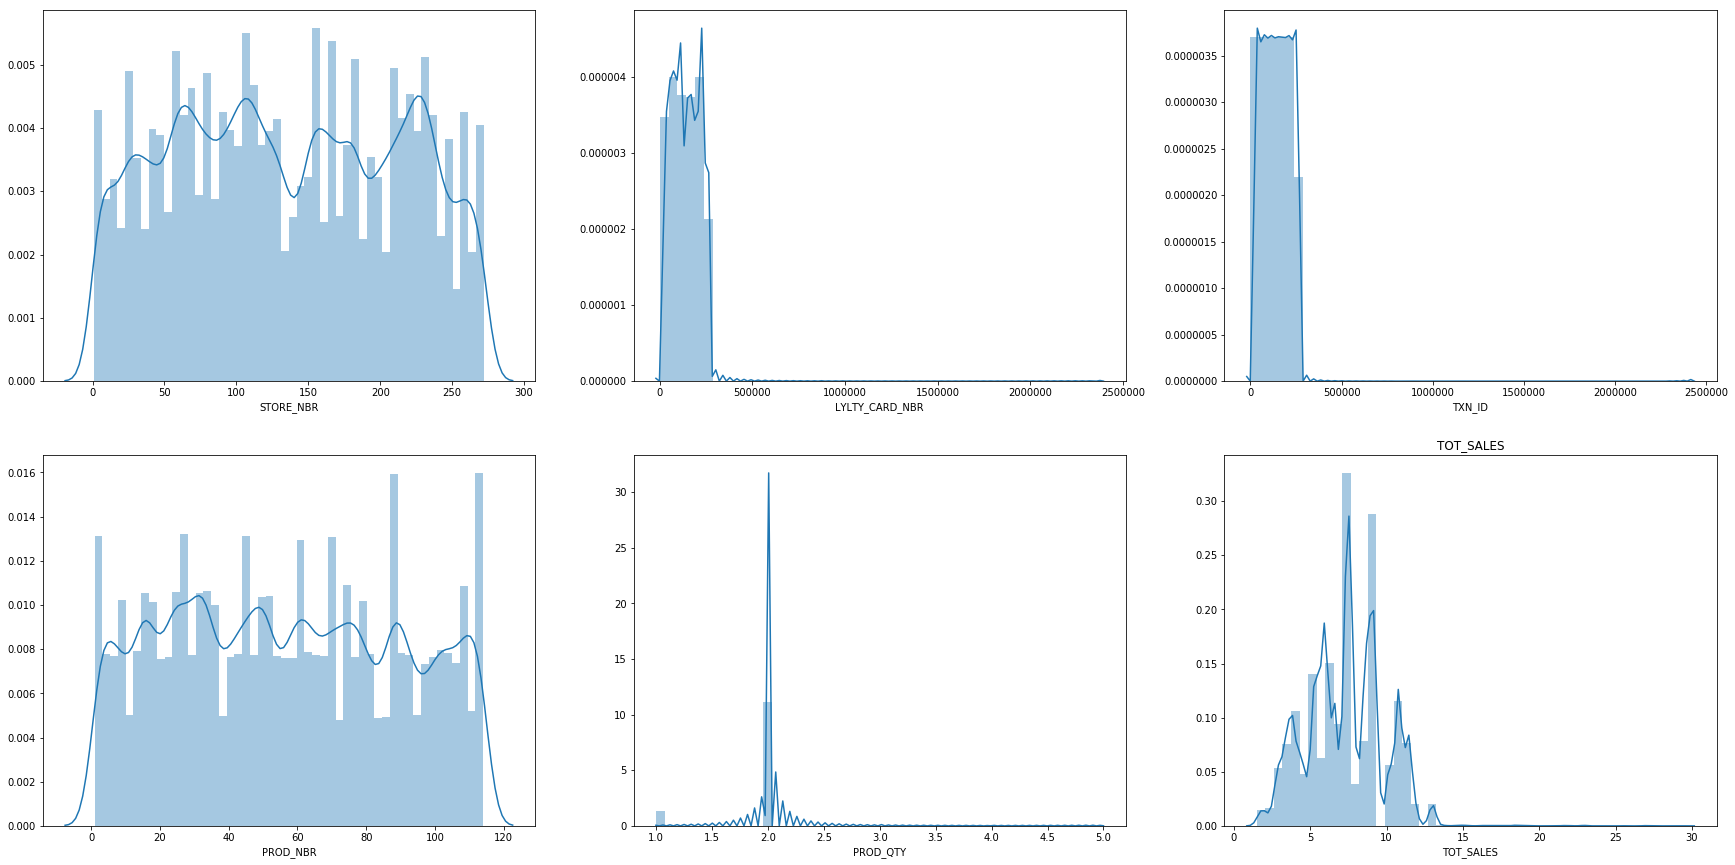

In [18]:
transactions_numeric = transactions_ol.drop(['DATE', 'PROD_NAME'], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,15))

for i, column in enumerate(transactions_numeric.columns):
    sns.distplot(transactions_numeric[column], ax=axes[i//3,i%3])
    plt.title(column)

In [19]:
prodnum_counts = transactions_ol.PROD_NBR.value_counts().tolist()
prodname_counts = transactions_ol.PROD_NAME.value_counts().tolist()

print(prodnum_counts == prodname_counts)

True


### Purchase Behaviour Set

The purchase behaviour data set has 72,637 rows and 3 columns. Of these columns, loyalty card number is numeric (int64) and lifestage and premium customer contain strings.

When examining value counts of the two text columns we see that in the lifestage column retirees appear the most frequently with 14,805 rows and new families the least frequently with 2,549 rows. In premium customer status, we see the majority of customers are mainstream with 29,245 rows, budget appear less frequently with 24,470 rows and premium customers appear the least frequently with 18,922 rows.

In [20]:
purchase_behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [21]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
print(type(purchase_behaviour.LIFESTAGE[0]))
print(type(purchase_behaviour.PREMIUM_CUSTOMER[0]))

<class 'str'>
<class 'str'>


In [23]:
lifestage_counts = purchase_behaviour.LIFESTAGE.value_counts()
premium_counts = purchase_behaviour.PREMIUM_CUSTOMER.value_counts()

print(lifestage_counts)

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


Text(0.5,1,'Lifestage Frequencies')

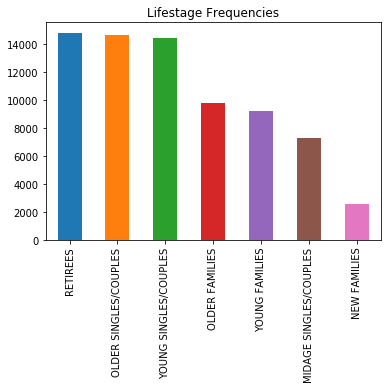

In [24]:
lifestage_counts.plot(kind='bar')
plt.title('Lifestage Frequencies')

In [25]:
print(premium_counts)

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


Text(0.5,1,'Customer Status Frequencies')

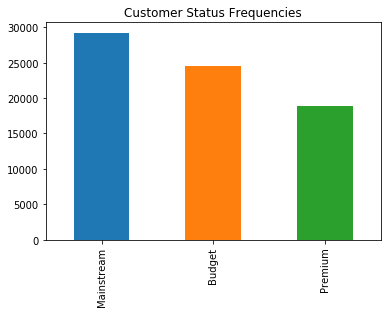

In [26]:
premium_counts.plot(kind='bar')
plt.title('Customer Status Frequencies')

### Merging The Two Datasets

Taking the loyalty card numbers as unique customer identifiers, we check to see if the number of unique loyalty card numbers in both datasets are equal. We see there are 72,636 unique loyalty card numbers in the transactions set because we removed the two outliers, both from the same customer. So the cleaned transactions set has one less unique loyalty card number than the purchase behaviour set. But both datasets are still drawn from an identical set of customers. So we will merge the two sets on the loyalty card number column.

In [27]:
print(len(transactions_ol.LYLTY_CARD_NBR.unique()))
print(len(purchase_behaviour.LYLTY_CARD_NBR.unique()))

72636
72637


In [28]:
data = pd.merge(transactions_ol, purchase_behaviour, on='LYLTY_CARD_NBR')
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


### Feature Engineering

We will derive features indicating pack size and brand name from the product name column. Here is a summary of the frequencies with which each product appears in the dataset.

In [29]:
data.PROD_NAME.value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Kettle Sensations   Camembert & Fig 150g    3219
Doritos Corn Chips  Cheese Supreme 170g     3217
Pringles Barbeque   134g                    3210
Doritos Corn Chip Mexican Jalapeno 150g     3204
Kettle Sweet Chilli And Sour Cream 175g     3200
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Thins Chips Light&  Tangy 175g              3188
Dorito Corn Chp     Supreme 380g            3183
Pringles Sweet&Spcy BBQ 134g                3177
Infuzions BBQ Rib   Prawn Crackers 110g     3174
Tyrrells Crisps     

#### Product Type

We see some of the items are salsa rather than chips, but there are also entries that appear to be chips but are salsa flavoured. We want to determine which products are salsa and remove those as we are interested only in chips.

In [30]:
#type(prod_split)
salsa = data.PROD_NAME[data.PROD_NAME.str.contains('|'.join(['salsa', 'Salsa'])).any(level=0)]
salsa.value_counts()
#alsa = prod_split['salsa' in prod_split]

Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
Name: PROD_NAME, dtype: int64

It appears that 'Smiths Crinkle Cut Tomato Salsa 150g' and 'Red Rock Deli SR Salsa & Mzzrlla 150g' are chips so we will leave these and remove all other rows containing salsa as these are not chip products.

In [31]:
data.drop(data[data.PROD_NAME == 'Old El Paso Salsa   Dip Chnky Tom Ht300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Old El Paso Salsa   Dip Tomato Mild 300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Woolworths Mild     Salsa 300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Doritos Salsa Mild  300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Doritos Salsa       Medium 300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Woolworths Medium   Salsa 300g'].index, inplace=True)
data.drop(data[data.PROD_NAME == 'Old El Paso Salsa   Dip Tomato Med 300g'].index, inplace=True)

salsa = data.PROD_NAME[data.PROD_NAME.str.contains('|'.join(['salsa', 'Salsa'])).any(level=0)]
salsa.value_counts()
#data.head()

Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Name: PROD_NAME, dtype: int64

Now we can split the strings in PROD_NAME to obtain the brand and pack size.

In [32]:
prod_split = data.PROD_NAME.str.split()
print(prod_split.head())

0            [Natural, Chip, Compny, SeaSalt175g]
1                      [CCs, Nacho, Cheese, 175g]
2            [WW, Original, Stacked, Chips, 160g]
3                           [CCs, Original, 175g]
4    [Smiths, Crinkle, Cut, Chips, Chicken, 170g]
Name: PROD_NAME, dtype: object


#### Brand Name

After splitting each string in PROD_NAME into a list of strings, we note that the first entry of each corresponds to the brand. However there are some variations in spelling which correspond to the same brand, so we alter these to make them consistent. We then merge the new BRAND column with the existing dataset.

The most popular brand appears to be Kettle with 41,288 transactions, followed by Smiths with 31,823 transactions, then Doritos with 25,224 transactions. We can see the distribution of brand popularity in a histogram.

In [33]:
brand = prod_split.str[0]
brand = brand.replace(to_replace = 'Old', value = 'Old El Paso')
brand = brand.replace(to_replace = 'RRD', value = 'Red Rock Deli')
brand = brand.replace(to_replace = 'Grain', value = 'Grain Waves')
brand = brand.replace(to_replace = 'Natural', value = 'Natural Chip Co')
brand = brand.replace(to_replace = 'Red', value = 'Red Rock Deli')
brand = brand.replace(to_replace = 'WW', value = 'Woolworths')
brand = brand.replace(to_replace = 'Dorito', value = 'Doritos')
brand = brand.replace(to_replace = 'Infzns', value = 'Infuzions')
brand = brand.replace(to_replace = 'Smith', value = 'Smiths')
brand = brand.replace(to_replace = 'Snbts', value = 'Sunbites')
brand = brand.replace(to_replace = 'Burger', value = 'Burger Rings')
brand = brand.replace(to_replace = 'GrnWves', value = 'Grain Waves')
brand = brand.replace(to_replace = 'NCC', value = 'Natural Chip Co')
brand = brand.replace(to_replace = 'French', value = 'French Fries')

print(brand.value_counts())

Kettle             41288
Smiths             31823
Doritos            25224
Pringles           25102
Red Rock Deli      17779
Infuzions          14201
Thins              14075
Woolworths         11836
Cobs                9693
Tostitos            9471
Twisties            9454
Grain Waves         7740
Natural Chip Co     7469
Tyrrells            6442
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger Rings        1564
French Fries        1418
Name: PROD_NAME, dtype: int64


In [34]:
brand = brand.to_frame()
data_fe = data.merge(brand, left_index=True, right_index=True)

In [35]:
data_fe.rename(columns = {'PROD_NAME_x':'PROD_NAME'}, inplace = True) 
data_fe.rename(columns = {'PROD_NAME_y':'BRAND'}, inplace = True)
data_fe.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,Woolworths
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths


Text(0.5,1,'Brand Frequencies')

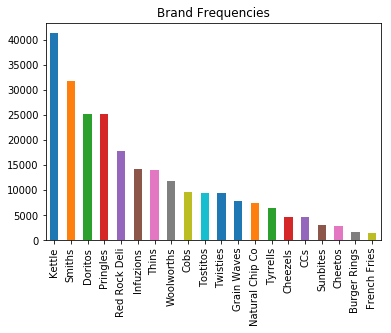

In [36]:
brand_counts = data_fe.BRAND.value_counts()
brand_counts.plot(kind='bar')
plt.title('Brand Frequencies')

#### Pack Size

We notice that pack size corresponds to the last entry in each list of strings. Only rows with the value 'Kettle 135g Swt Pot Sea Salt' do not follow the pattern of the pack size being the last element listed. Instead the last substring is 'Salt'. However the pack size is 135 grams for each of these rows, so we replace 'Salt' with '135g'. We then remove the 'g' from each entry and convert the number from a string into an integer. We then merge the new PACK_SIZE column with the existing dataset.

We see that the largest pack size is 380g and the smallest is 70g. This will likely affect the TOT_SALES value for each transaction as larger packs will likely be priced higher and smaller packs priced lower. The most commonly sold pack size appears to be the 175g with 66,390 transactions, followed by the 150g with 43,131 transactions.

In [37]:
pack_size = prod_split.str[-1]
pack_size = pack_size.replace(to_replace = 'Chckn175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Chicken270g', value = '270g')
pack_size = pack_size.replace(to_replace = 'Ht300g', value = '300g')
pack_size = pack_size.replace(to_replace = '210G', value = '210g')
pack_size = pack_size.replace(to_replace = '150G', value = '150g')
pack_size = pack_size.replace(to_replace = 'Chs&Onion170g', value = '170g')
pack_size = pack_size.replace(to_replace = 'SeaSalt175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Chli&S/Cream175G', value = '175g')
pack_size = pack_size.replace(to_replace = 'CutSalt/Vinegr175g', value = '175g')
pack_size = pack_size.replace(to_replace = 'Salt', value = '135g')

# Remove grams symbol and cast as int
pack_size = pack_size.str.replace(r'g', '')
pack_size = pack_size.astype(int)

pack_size.value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PROD_NAME, dtype: int64

In [38]:
#salt_indx = pack_size[pack_size == 'Salt'].index
#salt_rows = data.iloc[salt_indx, :]
#salt_split = salt_rows.PROD_NAME.str.split()
#salt_split.str[1].unique()

In [39]:
pack_size = pack_size.to_frame()
data_fe = data_fe.merge(pack_size, left_index=True, right_index=True)
data_fe.rename(columns = {'PROD_NAME_x':'PROD_NAME'}, inplace = True) 
data_fe.rename(columns = {'PROD_NAME_y':'PACK_SIZE'}, inplace = True)

data_fe.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Co,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,Woolworths,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths,170


In [40]:
print('Largest Pack Size: ', data_fe.PACK_SIZE.max())
print('Smallest Pack Size: ', data_fe.PACK_SIZE.min())

Largest Pack Size:  380
Smallest Pack Size:  70


Text(0.5,1,'Pack Size Frequencies')

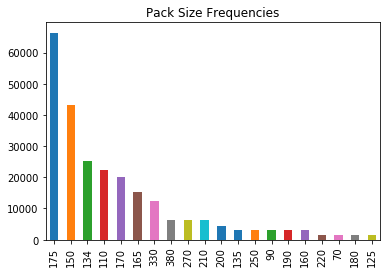

In [41]:
pack_size_counts = data_fe.PACK_SIZE.value_counts()
pack_size_counts.plot(kind='bar')
plt.title('Pack Size Frequencies')

In [42]:
data_fe.PACK_SIZE.value_counts().head()

175    66390
150    43131
134    25102
110    22387
170    19983
Name: PACK_SIZE, dtype: int64

#### Export Cleaned Feature Engineered Dataset to CSV

In [43]:
data_fe.to_csv(r'data.csv', index = False)

### Customer Analytics

We would like to determine customer segements that spend the most on chips. We can segment the dataset by different factors such as lifestage and premium customer status, and even combinations of these of the form (lifestage, status) to determine which segments are most lucrative.

#### Segment by Lifestage

We can begin by segmenting the dataset by lifestage and comparing total sales by segment.

In [44]:
# RETIREES
# OLDER SINGLES/COUPLES
# YOUNG SINGLES/COUPLES
# OLDER FAMILIES
# YOUNG FAMILIES
# MIDAGE SINGLES/COUPLES
# NEW FAMILIES

new_fam = data_fe[data_fe.LIFESTAGE == 'NEW FAMILIES']
mid_sc = data_fe[data_fe.LIFESTAGE == 'MIDAGE SINGLES/COUPLES']
young_fam = data_fe[data_fe.LIFESTAGE == 'YOUNG FAMILIES']
old_fam = data_fe[data_fe.LIFESTAGE == 'OLDER FAMILIES']
young_sc = data_fe[data_fe.LIFESTAGE == 'YOUNG SINGLES/COUPLES']
old_sc = data_fe[data_fe.LIFESTAGE == 'OLDER SINGLES/COUPLES']
retirees = data_fe[data_fe.LIFESTAGE == 'RETIREES']

Plotting the distribution of total sales for each segment, it is apparent that each is quite similar, somewhat right skewed and clustered mainly in the \$0 to \$15 range with increasing density towards the centre of this range.

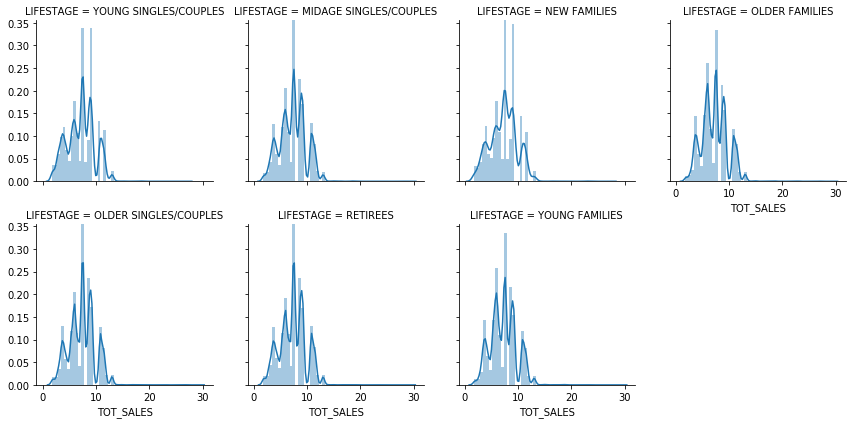

In [45]:
g = sns.FacetGrid(data_fe, col="LIFESTAGE", col_wrap=4)
g.map(sns.distplot, "TOT_SALES")
plt.show()

The mean total sales for each lifestage segment is around 7, so we subtract 7 from each to better see the differences, then order them from smallest to largest and plot in a barplot.

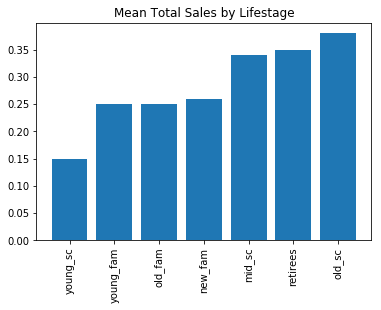

New Families:  7.26
Midage Singles & Couples:  7.34
Young Families:  7.25
Old Families:  7.25
Young Singles & Couples:  7.15
Old Singles & Couples:  7.38
Retirees:  7.35


In [46]:
D = {'new_fam' : round(new_fam.TOT_SALES.mean() - 7, 2),
     'mid_sc' : round(mid_sc.TOT_SALES.mean() - 7, 2),
     'young_fam' : round(young_fam.TOT_SALES.mean() - 7, 2),
     'old_fam' : round(old_fam.TOT_SALES.mean() - 7, 2),
     'young_sc' : round(young_sc.TOT_SALES.mean() - 7, 2),
     'old_sc' : round(old_sc.TOT_SALES.mean() - 7, 2),
     'retirees' : round(retirees.TOT_SALES.mean() - 7, 2)}

D = sorted(D.items(), key=lambda x: x[1])

D = dict(D)

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.title('Mean Total Sales by Lifestage')
plt.show()

print('New Families: ', round(new_fam.TOT_SALES.mean(), 2))
print('Midage Singles & Couples: ', round(mid_sc.TOT_SALES.mean(), 2))
print('Young Families: ', round(young_fam.TOT_SALES.mean(), 2))
print('Old Families: ', round(old_fam.TOT_SALES.mean(), 2))
print('Young Singles & Couples: ', round(young_sc.TOT_SALES.mean(), 2))
print('Old Singles & Couples: ', round(old_sc.TOT_SALES.mean(), 2))
print('Retirees: ', round(retirees.TOT_SALES.mean(), 2))

As we can see, young singles and couples have the lowest mean total spending per transaction at \$7.15. and old singles and couples have the highest mean total spending per transaction at \$7.38.

The plot seems to indicate that as the age of customers increases, they tend to spend more on average per transaction. Only new families are out of order in terms of age, spending more on average per transaction than old families.

However the differences in average spending per transaction when segmented by lifestage are not large with the difference between the largest spenders and the smallest spenders being 23c per transaction on average.

#### Segment by Premium Customer Status

We can segment by premium customer status and again compare mean total sales in dollars by segment.

In [47]:
# Mainstream
# Budget
# Premium

mainstream = data_fe[data_fe.PREMIUM_CUSTOMER == 'Mainstream']
budget = data_fe[data_fe.PREMIUM_CUSTOMER == 'Budget']
premium = data_fe[data_fe.PREMIUM_CUSTOMER == 'Premium']

Plotting the distributions of these segments, we see similar distributions to those of the segmentation on lifestage. All segments are somewhat right skewed, mainly conatined in the \$0 to \$15 range.

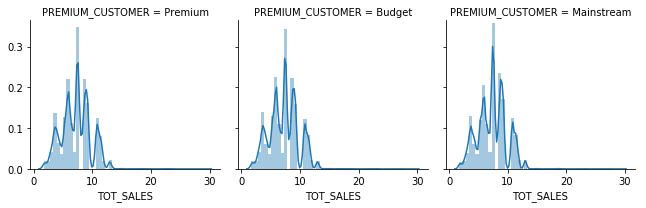

In [48]:
g = sns.FacetGrid(data_fe, col="PREMIUM_CUSTOMER", col_wrap=4)
g.map(sns.distplot, "TOT_SALES")
plt.show()

When examining the mean of total sales by segment,  we find the means are again all close to 7, so we subtract 7 to highlight the differences and plot as a barplot.

As expected, budget customers have the lowest mean total sales per transaction at \$7.26, but contrary to expectations premium customers have the same mean total sales while mainstream customers have the highest mean total sales at \$7.36.

Again, the differences in mean total sales between the premium customer status segments are not great, with the difference between the highest and lowest means being 10 cents.

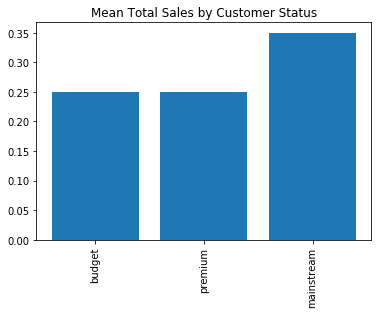

Budget:  7.25
Mainstream:  7.35
Premium:  7.25


In [49]:
d = {'mainstream' : round(mainstream.TOT_SALES.mean() - 7, 2),
     'budget' : round(budget.TOT_SALES.mean() - 7, 2),
     'premium' : round(premium.TOT_SALES.mean() - 7, 2)}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=90)
plt.title('Mean Total Sales by Customer Status')
plt.show()


print('Budget: ', round(budget.TOT_SALES.mean(), 2))
print('Mainstream: ', round(mainstream.TOT_SALES.mean(), 2))
print('Premium: ', round(premium.TOT_SALES.mean(), 2))

#### Segment by Lifestage and Premium Status

As there are 7 lifestage segments and 3 customer status categories, segmenting by lifestage-status combinations will produce 21 segments.

To see which segment spends the most on chips, we can sum the total sales for each segment. From the bar plot we can see:
- Old families with budget status actually are the highest spending segment in terms of total sales having spent \$158,379.95 over the course of the year covered in the dataset.
- Young singles and couples with mainstream status closely follow, spending \$148,337.20 in total.
- Retirees with mainstream status are the third larges spenders, having spent \$146,328.75 in total.

Of course, these numbers could be affected by the size of each segment in terms of customers, so examining this metric next we see:
- Young singles and couples with mainstream status that are the largest segment with 7,930 unique customers.
- Retirees with mainstream status are next largest with 6,382 unique customers.
- Old singles and couples with mainstream status are third largest with 4,870 unique customers.

Old families with budget status are actually only the 6th largest segment, meaning that they must either spend much more on average per transaction than the other segments or make more transactions per customer on average.

To determine this, we look at the mean total sales per transaction for each segment. To highlight the differences, we subtract \$6 from each. From the bar plot we can see:
- Midaged singles and couples with mainstream status have the highest mean total sales at \$7.61 per transaction.
- Young singles and couples with mainstream status have the second highest mean total sales at \$7.53 per transaction.
- Retirees with premium status have the third highest mean total sales at \$7.43 per transaction.

Surprisingly, old families with budget status have the 11th highest mean total sales at \$7.26 per transaction This suggests that rather than spending more per transaction, they must be making many more transactions per customer than other segments.

In fact, plotting total sales divided by number of unique customers per segment to get average number of transactions per customer in each segment, we see that:
- Old families of all statuses engage in the largest number of transactions with the average for each being around 33-34 transactions per customer over the year.
- Young families of all statuses follow closely, with an average of 32-33 transactions per customer over the year.
- Old singles and couples of all statuses come next averaging around 25-26 transactions per customer over the year.

When plotting total sales divided by total product quantity to get average price per pack of chips for each segment, we see:
- Mainstream young singles and couples spend the most per packet of chips on average.
- Mainstream middle aged singles and couples spend the second most.
- Mainstream new families spend the third most.

In [50]:
newfam_mainstream = new_fam[new_fam.PREMIUM_CUSTOMER == 'Mainstream']
newfam_budget = new_fam[new_fam.PREMIUM_CUSTOMER == 'Budget']
newfam_premium = new_fam[new_fam.PREMIUM_CUSTOMER == 'Premium']

midsc_mainstream = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Mainstream']
midsc_budget = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Budget']
midsc_premium = mid_sc[mid_sc.PREMIUM_CUSTOMER == 'Premium']

youngfam_mainstream = young_fam[young_fam.PREMIUM_CUSTOMER == 'Mainstream']
youngfam_budget = young_fam[young_fam.PREMIUM_CUSTOMER == 'Budget']
youngfam_premium = young_fam[young_fam.PREMIUM_CUSTOMER == 'Premium']

oldfam_mainstream = old_fam[old_fam.PREMIUM_CUSTOMER == 'Mainstream']
oldfam_budget = old_fam[old_fam.PREMIUM_CUSTOMER == 'Budget']
oldfam_premium = old_fam[old_fam.PREMIUM_CUSTOMER == 'Premium']

youngsc_mainstream = young_sc[young_sc.PREMIUM_CUSTOMER == 'Mainstream']
youngsc_budget = young_sc[young_sc.PREMIUM_CUSTOMER == 'Budget']
youngsc_premium = young_sc[young_sc.PREMIUM_CUSTOMER == 'Premium']

oldsc_mainstream = old_sc[old_sc.PREMIUM_CUSTOMER == 'Mainstream']
oldsc_budget = old_sc[old_sc.PREMIUM_CUSTOMER == 'Budget']
oldsc_premium = old_sc[old_sc.PREMIUM_CUSTOMER == 'Premium']

retirees_mainstream = retirees[retirees.PREMIUM_CUSTOMER == 'Mainstream']
retirees_budget = retirees[retirees.PREMIUM_CUSTOMER == 'Budget']
retirees_premium = retirees[retirees.PREMIUM_CUSTOMER == 'Premium']

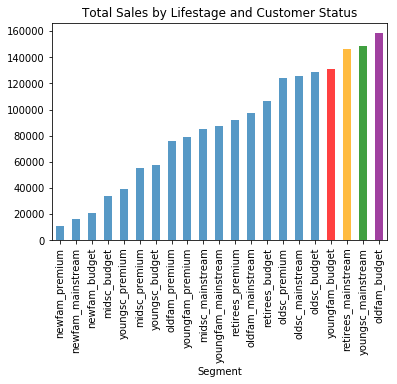

In [117]:
d = {
'newfam_mainstream' : round(newfam_mainstream.TOT_SALES.sum(), 2),
'newfam_budget' : round(newfam_budget.TOT_SALES.sum(), 2),
'newfam_premium' : round(newfam_premium.TOT_SALES.sum(), 2),
'midsc_mainstream' : round(midsc_mainstream.TOT_SALES.sum(), 2),
'midsc_budget' : round(midsc_budget.TOT_SALES.sum(), 2),
'midsc_premium' : round(midsc_premium.TOT_SALES.sum(), 2),
'youngfam_mainstream' : round(youngfam_mainstream.TOT_SALES.sum(), 2),
'youngfam_budget' : round(youngfam_budget.TOT_SALES.sum(), 2),
'youngfam_premium' : round(youngfam_premium.TOT_SALES.sum(), 2),
'oldfam_mainstream' : round(oldfam_mainstream.TOT_SALES.sum(), 2),
'oldfam_budget' : round(oldfam_budget.TOT_SALES.sum(), 2),
'oldfam_premium' : round(oldfam_premium.TOT_SALES.sum(), 2),
'youngsc_mainstream' : round(youngsc_mainstream.TOT_SALES.sum(), 2),
'youngsc_budget' : round(youngsc_budget.TOT_SALES.sum(), 2),
'youngsc_premium' : round(youngsc_premium.TOT_SALES.sum(), 2),
'oldsc_mainstream' : round(oldsc_mainstream.TOT_SALES.sum(), 2),
'oldsc_budget' : round(oldsc_budget.TOT_SALES.sum(), 2),
'oldsc_premium' : round(oldsc_premium.TOT_SALES.sum(), 2),
'retirees_mainstream' : round(retirees_mainstream.TOT_SALES.sum(), 2),
'retirees_budget' : round(retirees_budget.TOT_SALES.sum(), 2),
'retirees_premium' : round(retirees_premium.TOT_SALES.sum(), 2)}

d = sorted(d.items(), key=lambda x: x[1])

#d = dict(d)

#colour_dict = {'oldfam_budget': 'red',
#          'youngsc_mainstream': 'orange',
#          'retirees_mainstream': 'lightgreen',
#          'youngfam_budget': 'darkgreen'}
#plt.bar(range(len(d)), d.values(), align='center')
#plt.xticks(range(len(d)), list(d.keys()))
#plt.xticks(rotation=90)

tot_sales_df = pd.DataFrame(d, columns=['Segment', 'Tot_Sales'])
tot_sales_df = tot_sales_df.set_index('Segment')
tot_sales_df

ax = tot_sales_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[tot_sales_df.index.get_indexer(['oldfam_budget'])[0]].set_facecolor('purple')
ax.patches[tot_sales_df.index.get_indexer(['youngsc_mainstream'])[0]].set_facecolor('green')
ax.patches[tot_sales_df.index.get_indexer(['retirees_mainstream'])[0]].set_facecolor('orange')
ax.patches[tot_sales_df.index.get_indexer(['youngfam_budget'])[0]].set_facecolor('red')

plt.title('Total Sales by Lifestage and Customer Status')
plt.show()

In [52]:
print('newfam_mainstream total sales: ', round(newfam_mainstream.TOT_SALES.sum(), 2))
print('newfam_budget total sales: ', round(newfam_budget.TOT_SALES.sum(), 2))
print('newfam_premium total sales: ', round(newfam_premium.TOT_SALES.sum(), 2))
print()
print('midsc_mainstream total sales: ', round(midsc_mainstream.TOT_SALES.sum(), 2))
print('midsc_budget total sales: ', round(midsc_budget.TOT_SALES.sum(), 2))
print('midsc_premium total sales: ', round(midsc_premium.TOT_SALES.sum(), 2))
print()
print('youngfam_mainstream total sales: ', round(youngfam_mainstream.TOT_SALES.sum(), 2))
print('youngfam_budget total sales: ', round(youngfam_budget.TOT_SALES.sum(), 2))
print('youngfam_premium total sales: ', round(youngfam_premium.TOT_SALES.sum(), 2))
print()
print('oldfam_mainstream total sales: ', round(oldfam_mainstream.TOT_SALES.sum(), 2))
print('oldfam_budget total sales: ', round(oldfam_budget.TOT_SALES.sum(), 2))
print('oldfam_premium total sales: ', round(oldfam_premium.TOT_SALES.sum(), 2))
print()
print('youngsc_mainstream total sales: ', round(youngsc_mainstream.TOT_SALES.sum(), 2))
print('youngsc_budget total sales: ', round(youngsc_budget.TOT_SALES.sum(), 2))
print('youngsc_premium total sales: ', round(youngsc_premium.TOT_SALES.sum(), 2))
print()
print('oldsc_mainstream total sales: ', round(oldsc_mainstream.TOT_SALES.sum(), 2))
print('oldsc_budget total sales: ', round(oldsc_budget.TOT_SALES.sum(), 2))
print('oldsc_premium total sales: ', round(oldsc_premium.TOT_SALES.sum(), 2))
print()
print('retirees_mainstream total sales: ', round(retirees_mainstream.TOT_SALES.sum(), 2))
print('retirees_budget total sales: ', round(retirees_budget.TOT_SALES.sum(), 2))
print('retirees_premium total sales: ', round(retirees_premium.TOT_SALES.sum(), 2))

newfam_mainstream total sales:  16078.0
newfam_budget total sales:  20716.05
newfam_premium total sales:  10861.7

midsc_mainstream total sales:  85262.75
midsc_budget total sales:  33705.4
midsc_premium total sales:  55042.35

youngfam_mainstream total sales:  87227.85
youngfam_budget total sales:  130919.05
youngfam_premium total sales:  79249.1

oldfam_mainstream total sales:  97280.85
oldfam_budget total sales:  158379.95
oldfam_premium total sales:  75983.0

youngsc_mainstream total sales:  148337.2
youngsc_budget total sales:  57622.4
youngsc_premium total sales:  39347.9

oldsc_mainstream total sales:  125737.1
oldsc_budget total sales:  128683.8
oldsc_premium total sales:  124463.05

retirees_mainstream total sales:  146328.75
retirees_budget total sales:  106606.2
retirees_premium total sales:  91951.95


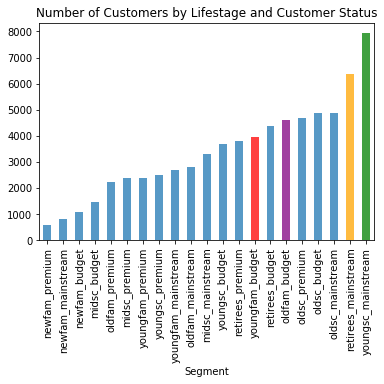

In [118]:
d = {
'newfam_mainstream' : len(newfam_mainstream.LYLTY_CARD_NBR.unique()),
'newfam_budget' : len(newfam_budget.LYLTY_CARD_NBR.unique()),
'newfam_premium' : len(newfam_premium.LYLTY_CARD_NBR.unique()),
'midsc_mainstream' : len(midsc_mainstream.LYLTY_CARD_NBR.unique()),
'midsc_budget' : len(midsc_budget.LYLTY_CARD_NBR.unique()),
'midsc_premium' : len(midsc_premium.LYLTY_CARD_NBR.unique()),
'youngfam_mainstream' : len(youngfam_mainstream.LYLTY_CARD_NBR.unique()),
'youngfam_budget' : len(youngfam_budget.LYLTY_CARD_NBR.unique()),
'youngfam_premium' : len(youngfam_premium.LYLTY_CARD_NBR.unique()),
'oldfam_mainstream' : len(oldfam_mainstream.LYLTY_CARD_NBR.unique()),
'oldfam_budget' : len(oldfam_budget.LYLTY_CARD_NBR.unique()),
'oldfam_premium' : len(oldfam_premium.LYLTY_CARD_NBR.unique()),
'youngsc_mainstream' : len(youngsc_mainstream.LYLTY_CARD_NBR.unique()),
'youngsc_budget' : len(youngsc_budget.LYLTY_CARD_NBR.unique()),
'youngsc_premium' : len(youngsc_premium.LYLTY_CARD_NBR.unique()),
'oldsc_mainstream' : len(oldsc_mainstream.LYLTY_CARD_NBR.unique()),
'oldsc_budget' : len(oldsc_budget.LYLTY_CARD_NBR.unique()),
'oldsc_premium' : len(oldsc_premium.LYLTY_CARD_NBR.unique()),
'retirees_mainstream' : len(retirees_mainstream.LYLTY_CARD_NBR.unique()),
'retirees_budget' : len(retirees_budget.LYLTY_CARD_NBR.unique()),
'retirees_premium' : len(retirees_premium.LYLTY_CARD_NBR.unique())}

d = sorted(d.items(), key=lambda x: x[1])

#d = dict(d)
#
#plt.bar(range(len(d)), d.values(), align='center', color = )
#plt.xticks(range(len(d)), list(d.keys()))
#plt.title('Number of Unique Customers by Lifestage and Customer Status')
#plt.xticks(rotation=90)
#plt.show()

num_customers_df = pd.DataFrame(d, columns=['Segment', 'Num_Cust'])
num_customers_df = num_customers_df.set_index('Segment')
num_customers_df

ax = num_customers_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[num_customers_df.index.get_indexer(['oldfam_budget'])[0]].set_facecolor('purple')
ax.patches[num_customers_df.index.get_indexer(['youngsc_mainstream'])[0]].set_facecolor('green')
ax.patches[num_customers_df.index.get_indexer(['retirees_mainstream'])[0]].set_facecolor('orange')
ax.patches[num_customers_df.index.get_indexer(['youngfam_budget'])[0]].set_facecolor('red')

plt.title('Number of Customers by Lifestage and Customer Status')
plt.show()

In [54]:
print('newfam_mainstream num unique customers: ', len(newfam_mainstream.LYLTY_CARD_NBR.unique()))
print('newfam_budget num unique customers: ', len(newfam_budget.LYLTY_CARD_NBR.unique()))
print('newfam_premium num unique customers: ', len(newfam_premium.LYLTY_CARD_NBR.unique()))
print()
print('midsc_mainstream num unique customers: ', len(midsc_mainstream.LYLTY_CARD_NBR.unique()))
print('midsc_budget num unique customers: ', len(midsc_budget.LYLTY_CARD_NBR.unique()))
print('midsc_premium num unique customers: ', len(midsc_premium.LYLTY_CARD_NBR.unique()))
print()
print('youngfam_mainstream num unique customers: ', len(youngfam_mainstream.LYLTY_CARD_NBR.unique()))
print('youngfam_budget num unique customers: ', len(youngfam_budget.LYLTY_CARD_NBR.unique()))
print('youngfam_premium num unique customers: ', len(youngfam_premium.LYLTY_CARD_NBR.unique()))
print()
print('oldfam_mainstream num unique customers: ', len(oldfam_mainstream.LYLTY_CARD_NBR.unique()))
print('oldfam_budget num unique customers: ', len(oldfam_budget.LYLTY_CARD_NBR.unique()))
print('oldfam_premium num unique customers: ', len(oldfam_premium.LYLTY_CARD_NBR.unique()))
print()
print('youngsc_mainstream num unique customers: ', len(youngsc_mainstream.LYLTY_CARD_NBR.unique()))
print('youngsc_budget num unique customers: ', len(youngsc_budget.LYLTY_CARD_NBR.unique()))
print('youngsc_premium num unique customers: ', len(youngsc_premium.LYLTY_CARD_NBR.unique()))
print()
print('oldsc_mainstream num unique customers: ', len(oldsc_mainstream.LYLTY_CARD_NBR.unique()))
print('oldsc_budget num unique customers: ', len(oldsc_budget.LYLTY_CARD_NBR.unique()))
print('oldsc_premium num unique customers: ', len(oldsc_premium.LYLTY_CARD_NBR.unique()))
print()
print('retirees_mainstream num unique customers: ', len(retirees_mainstream.LYLTY_CARD_NBR.unique()))
print('retirees_budget num unique customers: ', len(retirees_budget.LYLTY_CARD_NBR.unique()))
print('retirees_premium num unique customers: ', len(retirees_premium.LYLTY_CARD_NBR.unique()))

newfam_mainstream num unique customers:  834
newfam_budget num unique customers:  1092
newfam_premium num unique customers:  577

midsc_mainstream num unique customers:  3302
midsc_budget num unique customers:  1484
midsc_premium num unique customers:  2381

youngfam_mainstream num unique customers:  2693
youngfam_budget num unique customers:  3961
youngfam_premium num unique customers:  2404

oldfam_mainstream num unique customers:  2796
oldfam_budget num unique customers:  4622
oldfam_premium num unique customers:  2240

youngsc_mainstream num unique customers:  7930
youngsc_budget num unique customers:  3675
youngsc_premium num unique customers:  2499

oldsc_mainstream num unique customers:  4870
oldsc_budget num unique customers:  4864
oldsc_premium num unique customers:  4694

retirees_mainstream num unique customers:  6382
retirees_budget num unique customers:  4396
retirees_premium num unique customers:  3821


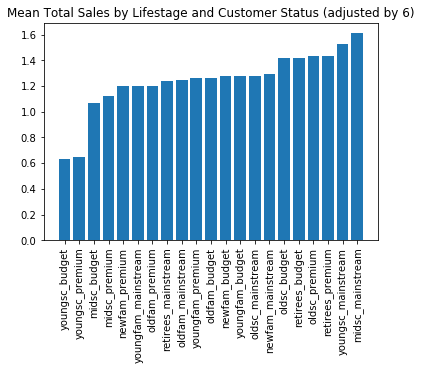

In [55]:
d = {
'newfam_mainstream' : round(newfam_mainstream.TOT_SALES.mean() - 6, 2),
'newfam_budget' : round(newfam_budget.TOT_SALES.mean() - 6, 2),
'newfam_premium' : round(newfam_premium.TOT_SALES.mean() - 6, 2),
'midsc_mainstream' : round(midsc_mainstream.TOT_SALES.mean() - 6, 2),
'midsc_budget' : round(midsc_budget.TOT_SALES.mean() - 6, 2),
'midsc_premium' : round(midsc_premium.TOT_SALES.mean() - 6, 2),
'youngfam_mainstream' : round(youngfam_mainstream.TOT_SALES.mean() - 6, 2),
'youngfam_budget' : round(youngfam_budget.TOT_SALES.mean() - 6, 2),
'youngfam_premium' : round(youngfam_premium.TOT_SALES.mean() - 6, 2),
'oldfam_mainstream' : round(oldfam_mainstream.TOT_SALES.mean() - 6, 2),
'oldfam_budget' : round(oldfam_budget.TOT_SALES.mean() - 6, 2),
'oldfam_premium' : round(oldfam_premium.TOT_SALES.mean() - 6, 2),
'youngsc_mainstream' : round(youngsc_mainstream.TOT_SALES.mean() - 6, 2),
'youngsc_budget' : round(youngsc_budget.TOT_SALES.mean() - 6, 2),
'youngsc_premium' : round(youngsc_premium.TOT_SALES.mean() - 6, 2),
'oldsc_mainstream' : round(oldsc_mainstream.TOT_SALES.mean() - 6, 2),
'oldsc_budget' : round(oldsc_budget.TOT_SALES.mean() - 6, 2),
'oldsc_premium' : round(oldsc_premium.TOT_SALES.mean() - 6, 2),
'retirees_mainstream' : round(retirees_mainstream.TOT_SALES.mean() - 6, 2),
'retirees_budget' : round(retirees_budget.TOT_SALES.mean() - 6, 2),
'retirees_premium' : round(retirees_premium.TOT_SALES.mean() - 6, 2)}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Mean Total Sales by Lifestage and Customer Status (adjusted by 6)')
plt.xticks(rotation=90)
plt.show()

In [56]:
print('newfam_mainstream mean total sales: ', round(newfam_mainstream.TOT_SALES.mean(), 2))
print('newfam_budget mean total sales: ', round(newfam_budget.TOT_SALES.mean(), 2))
print('newfam_premium mean total sales: ', round(newfam_premium.TOT_SALES.mean(), 2))
print()
print('midsc_mainstream mean total sales: ', round(midsc_mainstream.TOT_SALES.mean(), 2))
print('midsc_budget mean total sales: ', round(midsc_budget.TOT_SALES.mean(), 2))
print('midsc_premium mean total sales: ', round(midsc_premium.TOT_SALES.mean(), 2))
print()
print('youngfam_mainstream mean total sales: ', round(youngfam_mainstream.TOT_SALES.mean(), 2))
print('youngfam_budget mean total sales: ', round(youngfam_budget.TOT_SALES.mean(), 2))
print('youngfam_premium mean total sales: ', round(youngfam_premium.TOT_SALES.mean(), 2))
print()
print('oldfam_mainstream mean total sales: ', round(oldfam_mainstream.TOT_SALES.mean(), 2))
print('oldfam_budget mean total sales: ', round(oldfam_budget.TOT_SALES.mean(), 2))
print('oldfam_premium mean total sales: ', round(oldfam_premium.TOT_SALES.mean(), 2))
print()
print('youngsc_mainstream mean total sales: ', round(youngsc_mainstream.TOT_SALES.mean(), 2))
print('youngsc_budget mean total sales: ', round(youngsc_budget.TOT_SALES.mean(), 2))
print('youngsc_premium mean total sales: ', round(youngsc_premium.TOT_SALES.mean(), 2))
print()
print('oldsc_mainstream mean total sales: ', round(oldsc_mainstream.TOT_SALES.mean(), 2))
print('oldsc_budget mean total sales: ', round(oldsc_budget.TOT_SALES.mean(), 2))
print('oldsc_premium mean total sales: ', round(oldsc_premium.TOT_SALES.mean(), 2))
print()
print('retirees_mainstream mean total sales: ', round(retirees_mainstream.TOT_SALES.mean(), 2))
print('retirees_budget mean total sales: ', round(retirees_budget.TOT_SALES.mean(), 2))
print('retirees_premium mean total sales: ', round(retirees_premium.TOT_SALES.mean(), 2))

newfam_mainstream mean total sales:  7.29
newfam_budget mean total sales:  7.28
newfam_premium mean total sales:  7.2

midsc_mainstream mean total sales:  7.61
midsc_budget mean total sales:  7.07
midsc_premium mean total sales:  7.12

youngfam_mainstream mean total sales:  7.2
youngfam_budget mean total sales:  7.28
youngfam_premium mean total sales:  7.26

oldfam_mainstream mean total sales:  7.25
oldfam_budget mean total sales:  7.26
oldfam_premium mean total sales:  7.2

youngsc_mainstream mean total sales:  7.53
youngsc_budget mean total sales:  6.63
youngsc_premium mean total sales:  6.65

oldsc_mainstream mean total sales:  7.28
oldsc_budget mean total sales:  7.42
oldsc_premium mean total sales:  7.43

retirees_mainstream mean total sales:  7.24
retirees_budget mean total sales:  7.42
retirees_premium mean total sales:  7.43


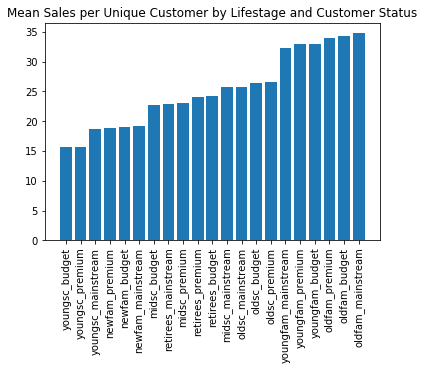

In [57]:
d = {
'newfam_mainstream' : round(newfam_mainstream.TOT_SALES.sum() / len(newfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'newfam_budget' : round(newfam_budget.TOT_SALES.sum() / len(newfam_budget.LYLTY_CARD_NBR.unique()), 2),
'newfam_premium' : round(newfam_premium.TOT_SALES.sum() / len(newfam_premium.LYLTY_CARD_NBR.unique()), 2),
'midsc_mainstream' : round(midsc_mainstream.TOT_SALES.sum() / len(midsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'midsc_budget' : round(midsc_budget.TOT_SALES.sum() / len(midsc_budget.LYLTY_CARD_NBR.unique()), 2),
'midsc_premium' : round(midsc_premium.TOT_SALES.sum() / len(midsc_premium.LYLTY_CARD_NBR.unique()), 2),
'youngfam_mainstream' : round(youngfam_mainstream.TOT_SALES.sum() / len(youngfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'youngfam_budget' : round(youngfam_budget.TOT_SALES.sum() / len(youngfam_budget.LYLTY_CARD_NBR.unique()), 2),
'youngfam_premium' : round(youngfam_premium.TOT_SALES.sum() / len(youngfam_premium.LYLTY_CARD_NBR.unique()), 2),
'oldfam_mainstream' : round(oldfam_mainstream.TOT_SALES.sum() / len(oldfam_mainstream.LYLTY_CARD_NBR.unique()), 2),
'oldfam_budget' : round(oldfam_budget.TOT_SALES.sum() / len(oldfam_budget.LYLTY_CARD_NBR.unique()), 2),
'oldfam_premium' : round(oldfam_premium.TOT_SALES.sum() / len(oldfam_premium.LYLTY_CARD_NBR.unique()), 2),
'youngsc_mainstream' : round(youngsc_mainstream.TOT_SALES.sum() / len(youngsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'youngsc_budget' : round(youngsc_budget.TOT_SALES.sum() / len(youngsc_budget.LYLTY_CARD_NBR.unique()), 2),
'youngsc_premium' : round(youngsc_premium.TOT_SALES.sum() / len(youngsc_premium.LYLTY_CARD_NBR.unique()), 2),
'oldsc_mainstream' : round(oldsc_mainstream.TOT_SALES.sum() / len(oldsc_mainstream.LYLTY_CARD_NBR.unique()), 2),
'oldsc_budget' : round(oldsc_budget.TOT_SALES.sum() / len(oldsc_budget.LYLTY_CARD_NBR.unique()), 2),
'oldsc_premium' : round(oldsc_premium.TOT_SALES.sum() / len(oldsc_premium.LYLTY_CARD_NBR.unique()), 2),
'retirees_mainstream' : round(retirees_mainstream.TOT_SALES.sum() / len(retirees_mainstream.LYLTY_CARD_NBR.unique()), 2),
'retirees_budget' : round(retirees_budget.TOT_SALES.sum() / len(retirees_budget.LYLTY_CARD_NBR.unique()), 2),
'retirees_premium' : round(retirees_premium.TOT_SALES.sum() / len(retirees_premium.LYLTY_CARD_NBR.unique()), 2)}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Mean Sales per Unique Customer by Lifestage and Customer Status')
plt.xticks(rotation=90)
plt.show()

In [58]:
print('newfam_mainstream: ', round(newfam_mainstream.TOT_SALES.sum() / len(newfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('newfam_budget: ', round(newfam_budget.TOT_SALES.sum() / len(newfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('newfam_premium: ', round(newfam_premium.TOT_SALES.sum() / len(newfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('midsc_mainstream: ', round(midsc_mainstream.TOT_SALES.sum() / len(midsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('midsc_budget: ', round(midsc_budget.TOT_SALES.sum() / len(midsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('midsc_premium: ', round(midsc_premium.TOT_SALES.sum() / len(midsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('youngfam_mainstream: ', round(youngfam_mainstream.TOT_SALES.sum() / len(youngfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('youngfam_budget: ', round(youngfam_budget.TOT_SALES.sum() / len(youngfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('youngfam_premium: ', round(youngfam_premium.TOT_SALES.sum() / len(youngfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('oldfam_mainstream: ', round(oldfam_mainstream.TOT_SALES.sum() / len(oldfam_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('oldfam_budget: ', round(oldfam_budget.TOT_SALES.sum() / len(oldfam_budget.LYLTY_CARD_NBR.unique()), 2))
print('oldfam_premium: ', round(oldfam_premium.TOT_SALES.sum() / len(oldfam_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('youngsc_mainstream: ', round(youngsc_mainstream.TOT_SALES.sum() / len(youngsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('youngsc_budget: ', round(youngsc_budget.TOT_SALES.sum() / len(youngsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('youngsc_premium: ', round(youngsc_premium.TOT_SALES.sum() / len(youngsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('oldsc_mainstream: ', round(oldsc_mainstream.TOT_SALES.sum() / len(oldsc_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('oldsc_budget: ', round(oldsc_budget.TOT_SALES.sum() / len(oldsc_budget.LYLTY_CARD_NBR.unique()), 2))
print('oldsc_premium: ', round(oldsc_premium.TOT_SALES.sum() / len(oldsc_premium.LYLTY_CARD_NBR.unique()), 2))
print()
print('retirees_mainstream: ', round(retirees_mainstream.TOT_SALES.sum() / len(retirees_mainstream.LYLTY_CARD_NBR.unique()), 2))
print('retirees_budget: ', round(retirees_budget.TOT_SALES.sum() / len(retirees_budget.LYLTY_CARD_NBR.unique()), 2))
print('retirees_premium: ', round(retirees_premium.TOT_SALES.sum() / len(retirees_premium.LYLTY_CARD_NBR.unique()), 2))

newfam_mainstream:  19.28
newfam_budget:  18.97
newfam_premium:  18.82

midsc_mainstream:  25.82
midsc_budget:  22.71
midsc_premium:  23.12

youngfam_mainstream:  32.39
youngfam_budget:  33.05
youngfam_premium:  32.97

oldfam_mainstream:  34.79
oldfam_budget:  34.27
oldfam_premium:  33.92

youngsc_mainstream:  18.71
youngsc_budget:  15.68
youngsc_premium:  15.75

oldsc_mainstream:  25.82
oldsc_budget:  26.46
oldsc_premium:  26.52

retirees_mainstream:  22.93
retirees_budget:  24.25
retirees_premium:  24.06


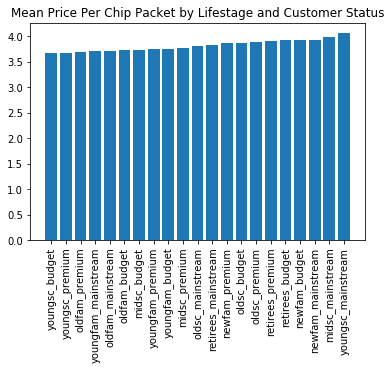

In [59]:
d = {
'newfam_mainstream' : (newfam_mainstream.TOT_SALES.sum() / newfam_mainstream.PROD_QTY.sum()),
'newfam_budget' : (newfam_budget.TOT_SALES.sum() / newfam_budget.PROD_QTY.sum()),
'newfam_premium' : (newfam_premium.TOT_SALES.sum() / newfam_premium.PROD_QTY.sum()),
'midsc_mainstream' : (midsc_mainstream.TOT_SALES.sum() / midsc_mainstream.PROD_QTY.sum()),
'midsc_budget' : (midsc_budget.TOT_SALES.sum() / midsc_budget.PROD_QTY.sum()),
'midsc_premium' : (midsc_premium.TOT_SALES.sum() / midsc_premium.PROD_QTY.sum()),
'youngfam_mainstream' : (youngfam_mainstream.TOT_SALES.sum() / youngfam_mainstream.PROD_QTY.sum()),
'youngfam_budget' : (youngfam_budget.TOT_SALES.sum() / youngfam_budget.PROD_QTY.sum()),
'youngfam_premium' : (youngfam_premium.TOT_SALES.sum() / youngfam_premium.PROD_QTY.sum()),
'oldfam_mainstream' : (oldfam_mainstream.TOT_SALES.sum() / oldfam_mainstream.PROD_QTY.sum()),
'oldfam_budget' : (oldfam_budget.TOT_SALES.sum() / oldfam_budget.PROD_QTY.sum()),
'oldfam_premium' : (oldfam_premium.TOT_SALES.sum() / oldfam_premium.PROD_QTY.sum()),
'youngsc_mainstream' : (youngsc_mainstream.TOT_SALES.sum() / youngsc_mainstream.PROD_QTY.sum()),
'youngsc_budget' : (youngsc_budget.TOT_SALES.sum() / youngsc_budget.PROD_QTY.sum()),
'youngsc_premium' : (youngsc_premium.TOT_SALES.sum() / youngsc_premium.PROD_QTY.sum()),
'oldsc_mainstream' : (oldsc_mainstream.TOT_SALES.sum() / oldsc_mainstream.PROD_QTY.sum()),
'oldsc_budget' : (oldsc_budget.TOT_SALES.sum() / oldsc_budget.PROD_QTY.sum()),
'oldsc_premium' : (oldsc_premium.TOT_SALES.sum() / oldsc_premium.PROD_QTY.sum()),
'retirees_mainstream' : (retirees_mainstream.TOT_SALES.sum() / retirees_mainstream.PROD_QTY.sum()),
'retirees_budget' : (retirees_budget.TOT_SALES.sum() / retirees_budget.PROD_QTY.sum()),
'retirees_premium' : (retirees_premium.TOT_SALES.sum() / retirees_premium.PROD_QTY.sum())}

d = sorted(d.items(), key=lambda x: x[1])

d = dict(d)

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.xticks(rotation=90)
plt.title('Mean Price Per Chip Packet by Lifestage and Customer Status')
plt.show()

Text(0.5,1,'Young Singles And Couples Most Popular Brands')

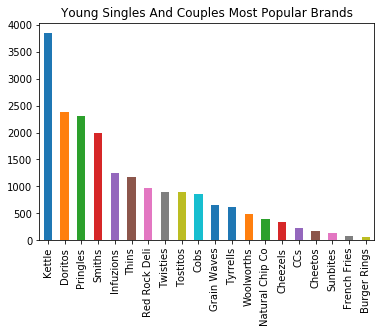

In [60]:
youngsc_mainstream_brands = youngsc_mainstream.BRAND.value_counts()
youngsc_mainstream_brands.plot(kind='bar')
plt.title('Young Singles And Couples Most Popular Brands')

Text(0.5,1,'Young Singles And Couples Most Popular Pack Size')

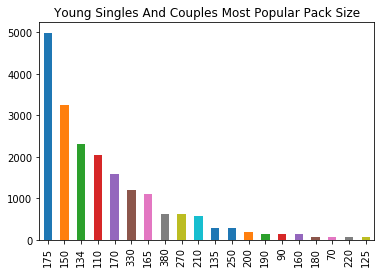

In [61]:
youngsc_mainstream_packsize = youngsc_mainstream.PACK_SIZE.value_counts()
youngsc_mainstream_packsize.plot(kind='bar')
plt.title('Young Singles And Couples Most Popular Pack Size')

Text(0.5,1,'Old Families Most Popular Brands')

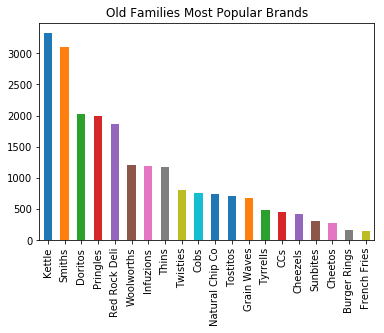

In [62]:
oldfam_budget_brands = oldfam_budget.BRAND.value_counts()
oldfam_budget_brands.plot(kind='bar')
plt.title('Old Families Most Popular Brands')

Text(0.5,1,'Old Families Most Popular Pack Size')

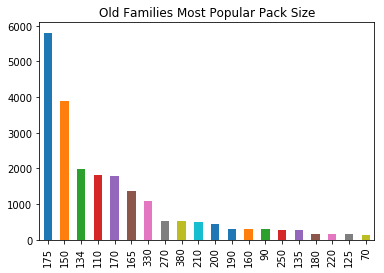

In [63]:
oldfam_budget_packsize = oldfam_budget.PACK_SIZE.value_counts()
oldfam_budget_packsize.plot(kind='bar')
plt.title('Old Families Most Popular Pack Size')

#### Most Popular Stores

We can also examine the total sales of the 6 stores that appear in the data set most frequently. In order of largest number of transactions, these are stores 226, 88, 165, 93, 237 and 43.

Plotting the distributions of total sales for these 6 stores, we see a similar pattern emerge as in the other segmentations. All the stores have distributions that are somewhat right skewed with values most frequently between \$0 and \$15. Store 88 seems to have the 'tallest' distribution even though it is second most popular, indicating that those who frequent this store tend to spend more money per transaction.

The difference in mean total sales between stores is somewhat larger than in the other segmentations. Store 93 has the lowest mean at \$6.99 per transaction with store 43 not much higher at \$7.01. Store 165 has the highest mean total sales at \$8.72.

Stores 226, 88 and 237 follow not far behind with means of \$8.63, \$8.65 and \$8.65. The difference in means between store 165 and store 93 is larger than in the other segmentations we have examined - a difference in mean of \$1.73. This suggests that stores 165, 226, 88 and 237 are lucrative stores, at least when it comes to chip sales.

When plotting the sum of total sales, we see:
- Store 226 has the highest total with \$16,544.65 worth of chips sold over the year.
- Store 88 comes in second with \$15,445.85
- Store 165 comes in third with \$15,188.35

This means total sales follow the order of popularity for the 3 most popular stores.

Text(0.5,1,'Most Popular Stores by Number of Transactions')

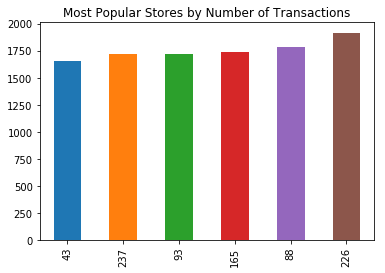

In [145]:
popular_stores = data_fe.STORE_NBR.value_counts().head(6)
popular_stores = popular_stores.sort_values(ascending=True)
popular_stores.plot(kind='bar')
plt.title('Most Popular Stores by Number of Transactions')

In [65]:
store226 = data_fe[data_fe.STORE_NBR == 226]
store88 = data_fe[data_fe.STORE_NBR == 88]
store93 = data_fe[data_fe.STORE_NBR == 93]
store165 = data_fe[data_fe.STORE_NBR == 165]
store237 = data_fe[data_fe.STORE_NBR == 237]
store43 = data_fe[data_fe.STORE_NBR == 43]

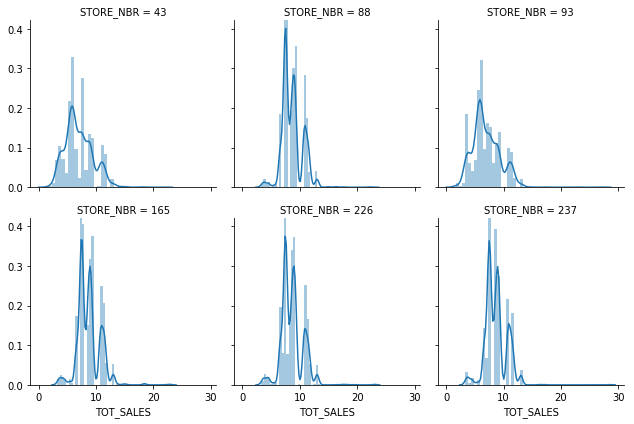

In [66]:
store_list = [226, 88, 165, 93, 237, 43]
pop_stores = data_fe[data_fe.STORE_NBR.isin(store_list)]

g = sns.FacetGrid(pop_stores, col="STORE_NBR", col_wrap=3)
g.map(sns.distplot, "TOT_SALES")
plt.show()

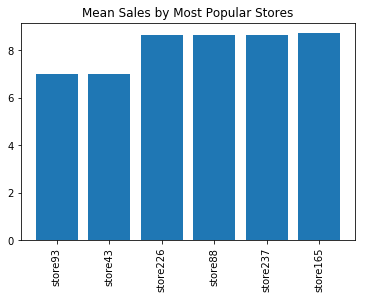

Store 226:  8.63
Store 88:  8.65
Store 93:  6.99
Store 165:  8.72
Store 237:  8.65
Store 43:  7.01


In [67]:
dic = {'store226' : round(store226.TOT_SALES.mean(), 2),
     'store88' : round(store88.TOT_SALES.mean(), 2),
     'store93' : round(store93.TOT_SALES.mean(), 2),
     'store165' : round(store165.TOT_SALES.mean(), 2),
     'store237' : round(store237.TOT_SALES.mean(), 2),
     'store43' : round(store43.TOT_SALES.mean(), 2)}

dic = sorted(dic.items(), key=lambda x: x[1])

dic = dict(dic)

plt.bar(range(len(dic)), dic.values(), align='center')
plt.xticks(range(len(dic)), list(dic.keys()))
plt.title('Mean Sales by Most Popular Stores')
plt.xticks(rotation=90)
plt.show()

print('Store 226: ', round(store226.TOT_SALES.mean(), 2))
print('Store 88: ', round(store88.TOT_SALES.mean(), 2))
print('Store 93: ', round(store93.TOT_SALES.mean(), 2))
print('Store 165: ', round(store165.TOT_SALES.mean(), 2))
print('Store 237: ', round(store237.TOT_SALES.mean(), 2))
print('Store 43: ', round(store43.TOT_SALES.mean(), 2))



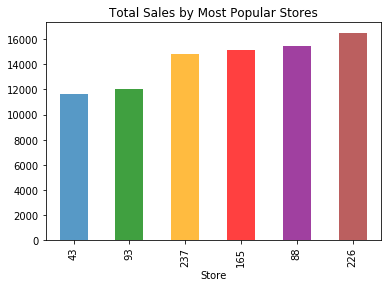

In [147]:
dic = {'226' : round(store226.TOT_SALES.sum(), 2),
     '88' : round(store88.TOT_SALES.sum(), 2),
     '93' : round(store93.TOT_SALES.sum(), 2),
     '165' : round(store165.TOT_SALES.sum(), 2),
     '237' : round(store237.TOT_SALES.sum(), 2),
     '43' : round(store43.TOT_SALES.sum(), 2)}

dic = sorted(dic.items(), key=lambda x: x[1])

#dic = dict(dic)
#
#plt.bar(range(len(dic)), dic.values(), align='center')
#plt.xticks(range(len(dic)), list(dic.keys()))
#plt.title('Total Sales by Most Popular Stores')
#plt.xticks(rotation=90)
#plt.show()
#
#print('Store 226: ', round(store226.TOT_SALES.sum(), 2))
#print('Store 88: ', round(store88.TOT_SALES.sum(), 2))
#print('Store 93: ', round(store93.TOT_SALES.sum(), 2))
#print('Store 165: ', round(store165.TOT_SALES.sum(), 2))
#print('Store 237: ', round(store237.TOT_SALES.sum(), 2))
#print('Store 43: ', round(store43.TOT_SALES.sum(), 2))

totsales_stores_df = pd.DataFrame(dic, columns=['Store', 'Tot_Sales'])
totsales_stores_df = totsales_stores_df.set_index('Store')

ax = totsales_stores_df.plot(kind='bar',stacked = False, alpha=0.75, rot=90, fontsize=10)
ax.legend_.remove()

ax.patches[totsales_stores_df.index.get_indexer(['226'])[0]].set_facecolor('brown')
ax.patches[totsales_stores_df.index.get_indexer(['165'])[0]].set_facecolor('red')
ax.patches[totsales_stores_df.index.get_indexer(['88'])[0]].set_facecolor('purple')
ax.patches[totsales_stores_df.index.get_indexer(['93'])[0]].set_facecolor('green')
ax.patches[totsales_stores_df.index.get_indexer(['237'])[0]].set_facecolor('orange')

plt.title('Total Sales by Most Popular Stores')
plt.show()

#### Plotting Time Series

Plotting mean total sales by date, we see that the mean tends to fluctuate around $7.30 per transaction for most of the year except in August 2018 and May 2019. 

Interestingly, these happen to be the months in which the two outlier transactons occurred, but even plotting the time series with the outliers included, the mean total sales for these months is still significantly lower than the other months of the year, dropping to around $5.75 per transaction.

Plotting summed total sales by date, the dips in sales in August 2018 and May 2019 are still apparent, but we also see an interesting peak that was not as visible when plotting the mean. This takes place over December 2018 - the Christmas period. It makes sense that sales of chips would increase in this time.

Text(0.5,1,'Mean Sales From July 2018 to July 2019')

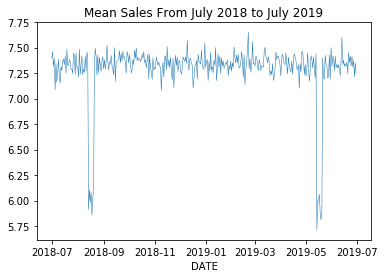

In [74]:
sales_no_ol = data_fe[data_fe.TOT_SALES < 600]

mean_sales_no_ol_ts = sales_no_ol.groupby(sales_no_ol.DATE.dt.date).TOT_SALES.mean()

#mean_sales_no_ol_ts.head()

mean_sales_no_ol_ts.plot(linewidth=0.5)
plt.title('Mean Sales From July 2018 to July 2019')

We can isolate these periods and plotting them to take a closer look.

(array([736877., 736884., 736891., 736898., 736905., 736912., 736919.,
        736926., 736933.]), <a list of 9 Text xticklabel objects>)

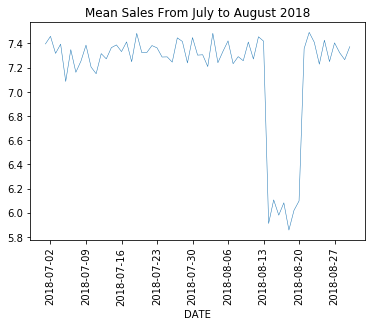

In [75]:
jul_aug_18 = mean_sales_no_ol_ts[0:61]

jul_aug_18.plot(linewidth=0.5)
plt.title('Mean Sales From July to August 2018')
plt.xticks(rotation=90)

Text(0.5,1,'Mean Sales From May June 2019')

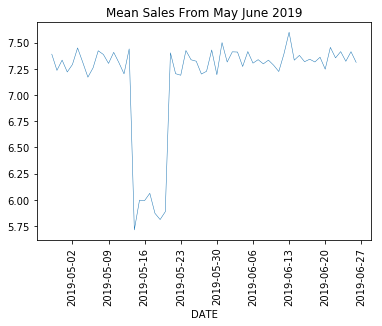

In [76]:
may_jun_19 = mean_sales_no_ol_ts[300:360]

may_jun_19.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Mean Sales From May June 2019')

Text(0.5,1,'Total Sales From July 2018 to July 2019')

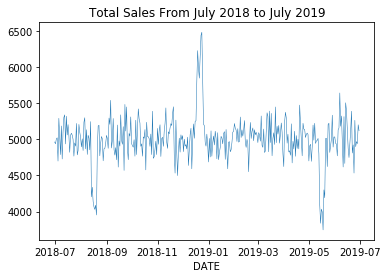

In [78]:
total_sales_no_ol_ts = sales_no_ol.groupby(sales_no_ol.DATE.dt.date).TOT_SALES.sum()

#mean_sales_no_ol_ts.head()

total_sales_no_ol_ts.plot(linewidth=0.5)
plt.title('Total Sales From July 2018 to July 2019')

Text(0.5,1,'Total Sales From July to August 2018')

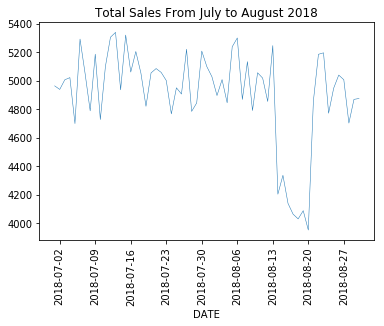

In [79]:
jul_aug_18_tot = total_sales_no_ol_ts[0:61]

jul_aug_18_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From July to August 2018')


Text(0.5,1,'Total Sales From May June 2019')

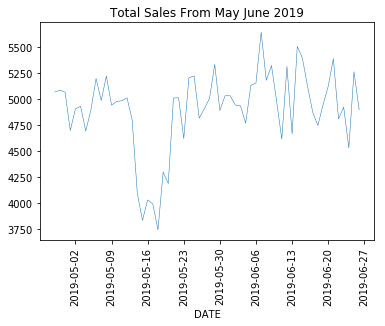

In [80]:
may_jun_19_tot = total_sales_no_ol_ts[300:360]

may_jun_19_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From May June 2019')

Text(0.5,1,'Total Sales From December 2018 to January 2019')

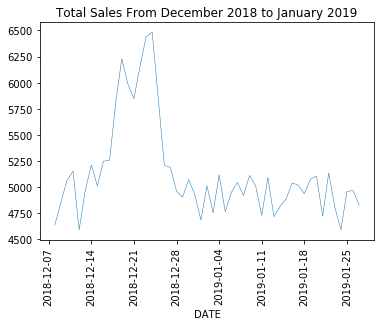

In [82]:
dec_jan_18_19_tot = total_sales_no_ol_ts[160:210]

dec_jan_18_19_tot.plot(linewidth=0.5)
plt.xticks(rotation=90)
plt.title('Total Sales From December 2018 to January 2019')

### Initial Findings

From a preliminary analysis, it appears that the most lucrative customer segment in terms of total chip sales are older families with budget status, despite being the 4th largest segment in terms of number of unique customers. Kettle is the most popular brand for this segment, followed closely by Smiths and 175g is the most popular pack size.

Old families of any status are very active shoppers with an average of around 33-34 transactions per customer per year. If the mainstream and premium old family shoppers could be encouraged to buy more expensive items in each transaction this could boost total sales in these segments as well.

Young singles and couples with mainstream status had the second highest total sales over the year and they are the largest customer segment in terms of unique customers. Retirees with mainstream status are the third largest spenders and are the 3rd largest customer segment.

We found that mainstream midage singles and couples spend the most per transaction on average, but this is the 11th largest segment, so is not very large in terms of unique customers, at least as reflected in this sample.

We also found that mainstream young singles and couples are willing to spend more on a pack of chips in each transaction, possibly buying more expensive brands. This is backed up when plotting the most frequently bought brands for this segment - premium brand Kettle is by far the most popular brand with mainstream young singles and couples, followed by Doritos, and 175g is the most popular pack size.

In terms of the most frequented stores, we found that Store 226 was the most lucrative for chip sales followed by Store 88 and then Store 165, which is also the order in which they are most popular as judged by the number of transactions recorded.

Examining fluctuations in total sales over the year, we see strange dips in sales in August and May, which are unexplained and could be investigated further to determine if this is a yearly occurrence or was particular to the 2018-2019 period the dataset was sampled from. There is an increase in total sales over December as expected due to Christmas.